In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [2]:
df = yf.download("AAPL", start="2015-01-01", end="2023-01-01")

prices = df['Close']

returns = prices.pct_change().dropna()
returns.head()


C:\Users\siddh\AppData\Local\Temp\ipykernel_8780\879261808.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2015-01-05,-0.028172
2015-01-06,0.000094
2015-01-07,0.014022
2015-01-08,0.038422
2015-01-09,0.001073


In [3]:
df_feat = pd.DataFrame()
df_feat["price"] = prices
df_feat["return"] = returns

df_feat["lag1"] = df_feat["return"].shift(1)
df_feat["lag2"] = df_feat["return"].shift(2)
df_feat["lag5"] = df_feat["return"].shift(5)

df_feat.tail()


,price,return,lag1,lag2,lag5
Date,,,,,
2022-12-23,129.900269,-0.002798,-0.023773,0.023810,-0.014579
2022-12-27,128.097504,-0.013878,-0.002798,-0.023773,-0.015909
2022-12-28,124.166786,-0.030685,-0.013878,-0.002798,-0.000529
2022-12-29,127.683731,0.028324,-0.030685,-0.013878,0.023810
2022-12-30,127.998993,0.002469,0.028324,-0.030685,-0.023773


In [4]:
df_feat["roll_mean_5"] = df_feat["return"].rolling(5).mean()
df_feat["roll_mean_21"] = df_feat["return"].rolling(21).mean()

df_feat["roll_vol_5"] = df_feat["return"].rolling(5).std()
df_feat["roll_vol_21"] = df_feat["return"].rolling(21).std()


In [5]:
df_feat["roll_max_20"] = df_feat["price"].rolling(20).max()
df_feat["roll_min_20"] = df_feat["price"].rolling(20).min()


In [6]:
df_feat["mom_5"] = df_feat["price"].pct_change(5)
df_feat["mom_21"] = df_feat["price"].pct_change(21)
df_feat["mom_63"] = df_feat["price"].pct_change(63)


In [7]:
df_feat["rv_21"] = np.sqrt((df_feat["return"]**2).rolling(21).sum() * 252)
df_feat["rv_63"] = np.sqrt((df_feat["return"]**2).rolling(63).sum() * 252)


In [8]:
df_feat["sma_20"] = df_feat["price"].rolling(20).mean()
df_feat["sma_50"] = df_feat["price"].rolling(50).mean()


In [9]:
df_feat["ema_20"] = df_feat["price"].ewm(span=20, adjust=False).mean()
df_feat["ema_50"] = df_feat["price"].ewm(span=50, adjust=False).mean()


In [10]:
delta = df_feat["price"].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)

roll_up = up.rolling(14).mean()
roll_down = down.rolling(14).mean()

rs = roll_up / roll_down
df_feat["rsi_14"] = 100 - (100 / (1 + rs))


In [11]:
df_final = df_feat.dropna()
df_final.head()
df_final.shape


(1951, 21)

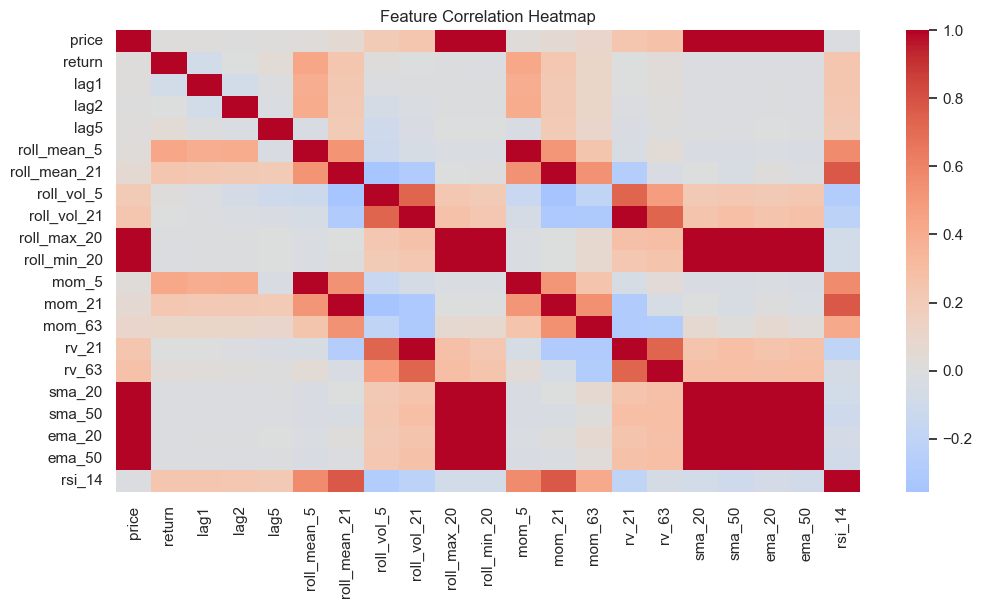

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df_final.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [15]:
df_feat["vol_ratio"] = df_feat["roll_vol_5"] / df_feat["roll_vol_21"]
df_feat["vol_ratio"]

Date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
                ...   
2022-12-23    0.881566
2022-12-27    0.872414
2022-12-28    1.032430
2022-12-29    1.066655
2022-12-30    1.197708
Name: vol_ratio, Length: 2014, dtype: float64

In [16]:
df_feat["trend_20_50"] = df_feat["sma_20"] - df_feat["sma_50"]
df_feat["trend_20_50"]

Date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
                ...   
2022-12-23   -3.347477
2022-12-27   -3.886429
2022-12-28   -4.313800
2022-12-29   -4.947205
2022-12-30   -5.582782
Name: trend_20_50, Length: 2014, dtype: float64

In [17]:
feat_cols = df_final.columns
df_norm = (df_final - df_final.mean()) / df_final.std()


In [18]:
df_norm

,price,return,lag1,lag2,lag5,roll_mean_5,roll_mean_21,roll_vol_5,roll_vol_21,roll_max_20,...,mom_5,mom_21,mom_63,rv_21,rv_63,sma_20,sma_50,ema_20,ema_50,rsi_14
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-06,-0.887191,0.805563,0.404310,-0.126647,-0.473037,0.737367,-0.138632,-0.029338,-0.349025,-0.899381,...,0.735195,-0.158186,0.701830,-0.404189,-0.044478,-0.888892,-0.883235,-0.889189,-0.889989,0.002566
2015-04-07,-0.893289,-0.607014,0.805364,0.405332,1.287690,-0.189090,-0.285595,-0.280789,-0.325082,-0.899381,...,-0.193396,-0.303020,0.844950,-0.381181,-0.092159,-0.889150,-0.881994,-0.888984,-0.889469,-0.451908
2015-04-08,-0.895154,-0.222769,-0.607156,0.806600,-0.863649,0.123679,-0.377484,-0.521592,-0.327656,-0.899381,...,0.121630,-0.392245,0.818088,-0.382784,-0.091413,-0.888901,-0.880802,-0.888976,-0.889045,-0.722061
2015-04-09,-0.890786,0.353293,-0.222927,-0.606673,-0.128012,0.358664,-0.031277,-0.516093,-0.410222,-0.899381,...,0.357884,-0.050093,0.767781,-0.462543,-0.101168,-0.887915,-0.879159,-0.888551,-0.888463,-0.446378
2015-04-10,-0.888329,0.174801,0.353112,-0.222239,0.404080,0.246339,0.243679,-0.546825,-0.496374,-0.899381,...,0.245061,0.228803,0.506411,-0.533506,-0.206453,-0.887310,-0.878031,-0.887932,-0.887806,-0.130676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1.189221,-0.198691,-1.307610,1.209156,-0.822747,-0.620538,-1.858807,0.196325,0.431821,1.376631,...,-0.626703,-1.769713,-1.275277,0.490613,1.231604,1.381845,1.480523,1.354400,1.470687,-1.644944
2022-12-27,1.152362,-0.784419,-0.198850,-1.307500,-0.893132,-0.568024,-1.788956,0.166551,0.413818,1.376631,...,-0.574674,-1.708788,-1.395181,0.463587,1.238538,1.367502,1.477213,1.336700,1.459981,-1.549562
2022-12-28,1.071995,-1.672927,-0.784554,-0.198149,-0.079469,-1.347635,-1.842988,0.496765,0.443114,1.376631,...,-1.336764,-1.756515,-1.500816,0.499098,1.274590,1.352209,1.470636,1.312995,1.446498,-1.651080


In [ ]:
lnr = df_norm.